In [8]:
cubs = 6**110

In [9]:
len(str(cubs))

86

In [14]:
bigly = 6**6**6

In [15]:
len(str(bigly))

36306

In [36]:
import math
from scipy.special import gamma as Gamma
from scipy.stats import beta
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
% matplotlib inline

In [17]:
def my_beta(a,b):
    beta_num = (math.gamma(a)*math.gamma(b))/math.gamma(a+b)
    return beta_num

In [19]:
% pwd

u'/Users/christophereppig/DSI_week3'

In [20]:
pre_poll = pd.read_csv('../Datasets/polls.csv')

In [67]:
poll = pd.read_csv('../Datasets/polls.csv', index_col=0)

In [27]:
pre_poll.head(10)

,year,survey,bush,state,edu,age,female,black,weight
0,1,9152,1.0,7,2,2,1,0,1403
1,1,9152,1.0,33,4,3,0,0,778
2,1,9152,0.0,20,2,1,1,0,1564
3,1,9152,1.0,31,3,2,1,0,1055
4,1,9152,1.0,18,3,1,1,0,1213
5,1,9152,1.0,31,4,2,0,0,910
6,1,9152,1.0,40,1,3,0,0,735
7,1,9152,1.0,33,4,2,1,0,410
8,1,9152,0.0,22,4,2,1,0,410
9,1,9152,1.0,22,4,3,0,0,778


In [24]:
pre_poll.drop('org', axis=1, inplace=True)

In [26]:
pre_poll.drop('Unnamed: 0', axis=1, inplace=True)

In [33]:
housing = pd.read_csv('../Datasets/housing.csv', index_col=0)

In [34]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [35]:
housing.shape

(506, 14)

In [38]:
## creates a dictionary with MEDV and CRIM values
housing_dict = dict(MEDV=housing['MEDV'].values,
                   CRIM=housing['CRIM'].values)

housing_dict

{'CRIM': array([  6.32000000e-03,   2.73100000e-02,   2.72900000e-02,
          3.23700000e-02,   6.90500000e-02,   2.98500000e-02,
          8.82900000e-02,   1.44550000e-01,   2.11240000e-01,
          1.70040000e-01,   2.24890000e-01,   1.17470000e-01,
          9.37800000e-02,   6.29760000e-01,   6.37960000e-01,
          6.27390000e-01,   1.05393000e+00,   7.84200000e-01,
          8.02710000e-01,   7.25800000e-01,   1.25179000e+00,
          8.52040000e-01,   1.23247000e+00,   9.88430000e-01,
          7.50260000e-01,   8.40540000e-01,   6.71910000e-01,
          9.55770000e-01,   7.72990000e-01,   1.00245000e+00,
          1.13081000e+00,   1.35472000e+00,   1.38799000e+00,
          1.15172000e+00,   1.61282000e+00,   6.41700000e-02,
          9.74400000e-02,   8.01400000e-02,   1.75050000e-01,
          2.76300000e-02,   3.35900000e-02,   1.27440000e-01,
          1.41500000e-01,   1.59360000e-01,   1.22690000e-01,
          1.71420000e-01,   1.88360000e-01,   2.29270000e-01,


In [39]:
## bayesian model with markov chain monte carlo sampling

with pm.Model() as model:
    pm.glm.glm("MEDV ~ CRIM", housing_dict)
    start = pm.find_MAP()      ## find starting value by optimization
    step = pm.NUTS(scaling=start)    ## instantiate MCMC sampling algorithm
    trace = pm.sample(2000, step, progressbar=True)   ## draw 2000 posterior samples

100%|██████████| 2000/2000 [00:03<00:00, 577.02it/s]


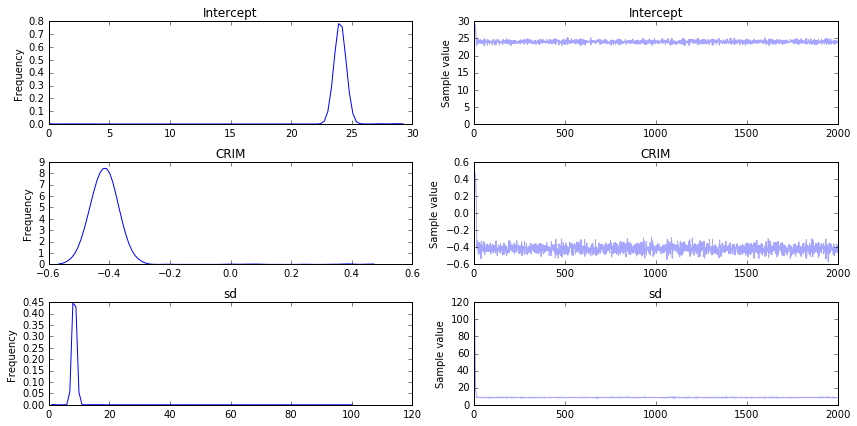

In [40]:
plt.figure(figsize=(7,7))
pm.traceplot(trace)
plt.tight_layout()

In [41]:
pm.summary(trace)


Intercept:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  23.997           1.230            0.040            [23.255, 24.895]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  23.234         23.762         24.035         24.326         24.879


CRIM:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.411           0.074            0.005            [-0.501, -0.326]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.501         -0.445         -0.416         -0.386         -0.326


sd:

  Mean             SD               MC Error         95% HPD interval
  -------------------

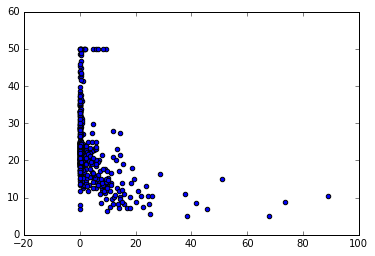

In [42]:
plt.scatter(housing['CRIM'], housing['MEDV'])

(-5, 100)

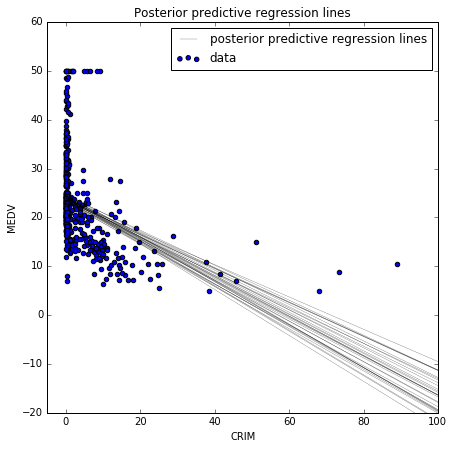

In [48]:
lm = lambda x, samp: samp['Intercept'] + samp['CRIM'] * x

plt.figure(figsize=(7,7))
pm.glm.plot_posterior_predictive(trace,
                                eval=np.linspace(100,0), 
                                lm=lm,
                                label='posterior predictive regression lines')
plt.scatter(housing['CRIM'], housing['MEDV'], label='data')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.ylim(-20, 60)
plt.xlim(-5, 100)

In [49]:
trace.get_values()

TypeError: get_values() takes at least 2 arguments (1 given)

In [50]:
housing.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT', u'MEDV'],
      dtype='object')

In [51]:
housing_dict_bigger = dict(MEDV=housing['MEDV'].values,
                   CRIM=housing['CRIM'].values,
                   NOX=housing['NOX'].values,
                   LSTAT=housing['LSTAT'].values)

In [53]:
with pm.Model() as model:
    pm.glm.glm("MEDV ~ CRIM + NOX + LSTAT", housing_dict_bigger)
    start = pm.find_MAP()      ## find starting value by optimization
    step = pm.NUTS(scaling=start)    ## instantiate MCMC sampling algorithm
    trace_bigger_model = pm.sample(2000, step, progressbar=True)   ## draw 2000 posterior samples

100%|██████████| 2000/2000 [00:07<00:00, 283.20it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ac20b90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12b332990>]], dtype=object)

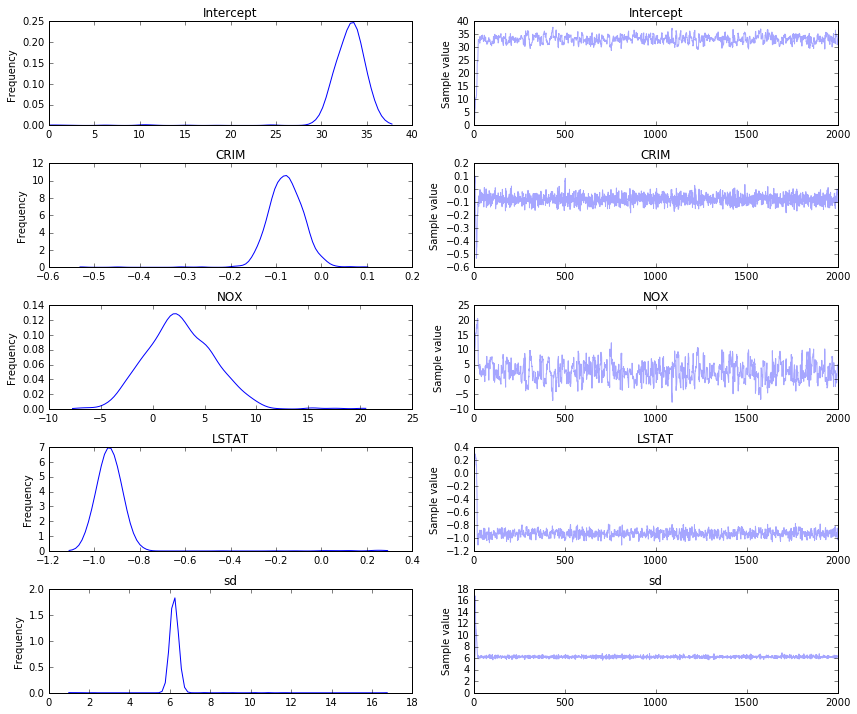

In [54]:
pm.traceplot(trace_bigger_model)

In [55]:
pm.summary(trace_bigger_model)


Intercept:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  32.916           2.925            0.255            [30.184, 35.972]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  30.079         32.110         33.234         34.162         35.897


CRIM:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.078           0.042            0.001            [-0.153, -0.008]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.147         -0.102         -0.078         -0.053         -0.002


NOX:

  Mean             SD               MC Error         95% HPD interval
  ------------------

In [56]:
housing['NOX'].mean()

0.5546950592885372

In [57]:
housing['LSTAT'].mean()

12.653063241106723

(-5, 100)

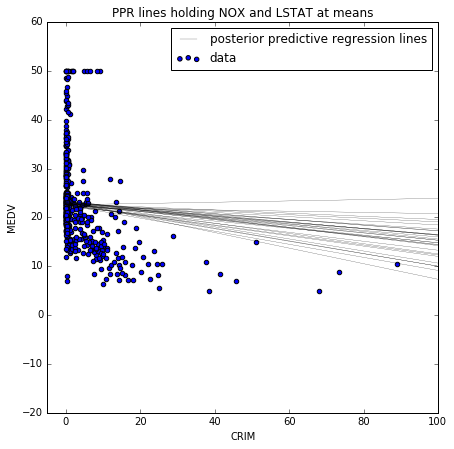

In [59]:
lm = lambda x, samp: samp['Intercept'] + samp['CRIM'] * x + samp['NOX'] * housing['NOX'].mean() + samp['LSTAT'] * housing['LSTAT'].mean()

plt.figure(figsize=(7,7))
pm.glm.plot_posterior_predictive(trace_bigger_model,
                                eval=np.linspace(100,0), 
                                lm=lm,
                                label='posterior predictive regression lines')
plt.scatter(housing['CRIM'], housing['MEDV'], label='data')

plt.title('PPR lines holding NOX and LSTAT at means')
plt.legend(loc=0)
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.ylim(-20, 60)
plt.xlim(-5, 100)

In [61]:
def predict_housing_value(crime_rate, nox, lstat):
    average_intercept = trace_bigger_model['Intercept'].mean()
    average_crime_coef = trace_bigger_model['CRIM'].mean()
    average_nox_coef = trace_bigger_model['NOX'].mean()
    average_lstat_coef = trace_bigger_model['LSTAT'].mean()
    return average_intercept + average_crime_coef*crime_rate * average_nox_coef*nox * average_lstat_coef*lstat

In [62]:
predict_housing_value(housing['CRIM'].mean(), housing['NOX'].mean(), housing['LSTAT'].mean())

37.908791664126355

In [63]:
housing[['CRIM', 'NOX', 'LSTAT']].describe()

,CRIM,NOX,LSTAT
count,506.000000,506.000000,506.000000
mean,3.613524,0.554695,12.653063
std,8.601545,0.115878,7.141062
min,0.006320,0.385000,1.730000
25%,0.082045,0.449000,6.950000
50%,0.256510,0.538000,11.360000
75%,3.677082,0.624000,16.955000
max,88.976200,0.871000,37.970000


In [64]:
predict_housing_value(0, 
                      housing['NOX'].median(), 
                      housing['LSTAT'].median())

32.916301390140347

#### Logistic bayesian regression

In [65]:
pre_poll.head()

,year,survey,bush,state,edu,age,female,black,weight
0,1,9152,1.0,7,2,2,1,0,1403
1,1,9152,1.0,33,4,3,0,0,778
2,1,9152,0.0,20,2,1,1,0,1564
3,1,9152,1.0,31,3,2,1,0,1055
4,1,9152,1.0,18,3,1,1,0,1213


In [68]:
poll.head()

,org,year,survey,bush,state,edu,age,female,black,weight
1,cbsnyt,1,9152,1.0,7,2,2,1,0,1403
2,cbsnyt,1,9152,1.0,33,4,3,0,0,778
3,cbsnyt,1,9152,0.0,20,2,1,1,0,1564
4,cbsnyt,1,9152,1.0,31,3,2,1,0,1055
5,cbsnyt,1,9152,1.0,18,3,1,1,0,1213


In [69]:
poll.shape

(13544, 10)

In [70]:
poll['org'].value_counts()

cbsnyt    13544
Name: org, dtype: int64

In [71]:
with pm.Model() as logistic_model:
    pm.glm.glm('bush ~ female + black', poll, family=pm.glm.families.Binomial())
    trace_logistic_model = pm.sample(2000, pm.NUTS(), progressbar=True)

100%|██████████| 2000/2000 [00:30<00:00, 81.09it/s]


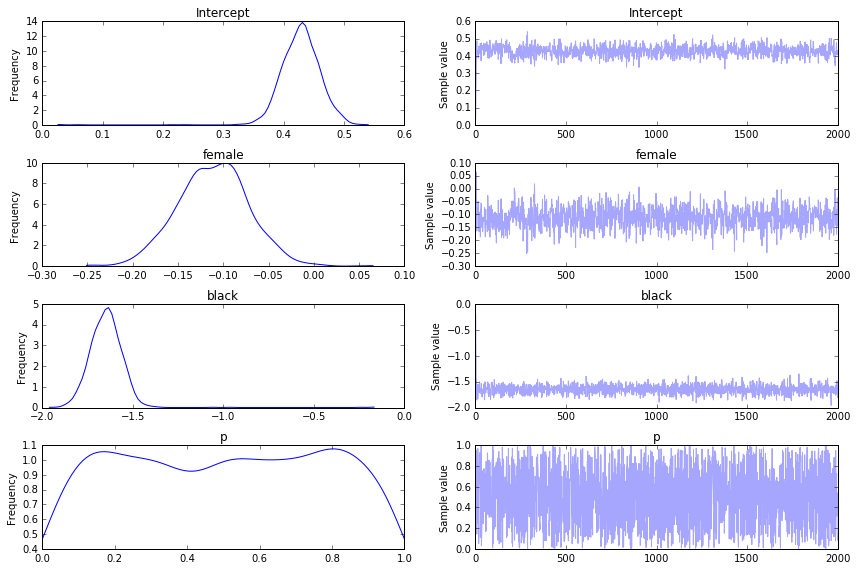

In [74]:
plt.figure(figsize=(7,7))
pm.traceplot(trace_logistic_model)
plt.tight_layout()

In [75]:
pm.summary(trace_logistic_model)


Intercept:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.428            0.034            0.001            [0.375, 0.492]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.371          0.408          0.429          0.449          0.489


female:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.111           0.039            0.001            [-0.183, -0.032]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.188         -0.137         -0.110         -0.086         -0.036


black:

  Mean             SD               MC Error         95% HPD interval
  -----------------

In [78]:
trace_logistic_model['Intercept']

array([ 0.02629045,  0.02629045,  0.0601075 , ...,  0.43167329,
        0.43125289,  0.4105525 ])

In [79]:
trace_logistic_model['black']

array([-0.16767809, -0.16767809, -0.24003554, ..., -1.60362072,
       -1.65008144, -1.80494983])

In [80]:
trace_logistic_model['female']

array([ 0.00480951,  0.00480951,  0.00894775, ..., -0.06855143,
       -0.03595813, -0.14398229])

In [83]:
import seaborn as sns

In [81]:
def plot_findings(trace, x_axis, y_axis):
    x = trace[x_axis]
    y = trace[y_axis]
    plt.scatter(x,y)
    plt.xlabel('%s estimates' % x_axis)
    plt.ylabel('%s estimates' % y_axis)
    plt.show()

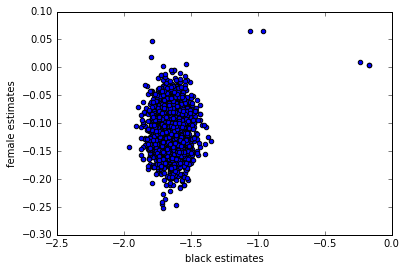

In [82]:
plot_findings(trace_logistic_model, 'black', 'female')

In [84]:
sns.joinplot(trace_logistic_model['black'], trace_logistic_model['female'])

plt.show()

AttributeError: 'module' object has no attribute 'joinplot'